In [4]:
# coding: utf-8

import logging
import sys
sys.path.append('/home/archit/master_project/pybnn')
import numpy as np
import matplotlib.pyplot as plt

import torch

from pybnn import DeepEnsemble

# plt.rc('text', usetex=True)
if torch.cuda.is_available():
    print(f"Using device {torch.cuda.get_device_name(torch.cuda.current_device())}")

# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)

plt.rc('text', usetex=False)
plt.rc('font', size=15.0, family='serif')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

Using device GeForce GTX 1050 Ti


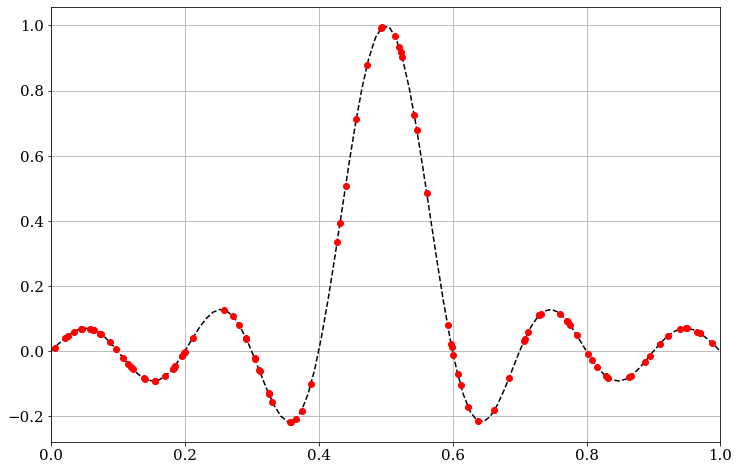

In [5]:
def f(x):
    return np.sinc(x * 10 - 5)



rng = np.random.RandomState(42)

x = rng.rand(100)
y = f(x)

grid = np.linspace(0, 1, 100)
fvals = f(grid)

plt.plot(grid, fvals, "k--")
plt.plot(x, y, "ro")
plt.grid()
plt.xlim(0, 1)

plt.show()

In [ ]:
mlp_params = {
    "num_epochs": 500,
    "learning_rate": 0.001,
    "adapt_epoch": 5000,
    "batch_size": 10,
    "n_units": [50, 50, 50],
    "input_dims": 1,
    "output_dims": 2,
}

model = DeepEnsemble(batch_size=10, mlp_params=mlp_params, nlearners=5, normalize_input=True,
                 normalize_output=True, rng=None)
model.fit(x[:, None], y)


m, std = model.predict(grid[:, None])
# logging.info(f"Prediced mean is {m}, predicted standard deviation is {std}")
plt.plot(x, y, "ro")
plt.grid()
plt.plot(grid, fvals, "k--")
plt.plot(grid, m, "blue")
plt.fill_between(grid, m + std, m - std, color="orange", alpha=0.8)
plt.fill_between(grid, m + 2 * std, m - 2 * std, color="orange", alpha=0.6)
plt.fill_between(grid, m + 3 * std, m - 3 * std, color="orange", alpha=0.4)
plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()

INFO:root:Training learner 0.
INFO:root:Finished training learner 0
********************

INFO:root:Training learner 1.
INFO:root:Finished training learner 1
********************

INFO:root:Training learner 2.
INFO:root:Finished training learner 2
********************

INFO:root:Training learner 3.
INFO:root:Finished training learner 3
********************

INFO:root:Training learner 4.
